In [1]:
import sys
print(sys.version_info) 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.interpolate as interpolate
import nibabel as nib 
import os

sys.version_info(major=3, minor=5, micro=6, releaselevel='final', serial=0)


In [2]:
def nib_load(file_name):
    proxy = nib.load(file_name)
    data = proxy.get_data()
    proxy.uncache()
    return data

In [3]:
path = '/home/ricardo/MyProgram/Task1/Brats18_dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_TCIA01_412_1/Brats18_TCIA01_412_1_flair.nii.gz'

# 载入数据

(240, 240, 155)


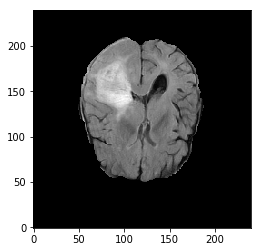

In [4]:
test = nib_load(path)
print(test.shape) 
plt.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.show()

# NIfT 保存

In [5]:
nii0 = nib.load(path)
img = nii0.get_data()
affine = nii0.affine.copy()

In [6]:
nii0

In [7]:
affine

array([[ -1.,   0.,   0.,  -0.],
       [  0.,  -1.,   0., 239.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.]])

In [8]:
affine.shape

(4, 4)

In [9]:
path1 = '/home/ricardo/MyProgram/Task1/test.nii.gz'
nii1=nib.Nifti1Image(img,affine=affine)
nib.save(nii1, path1)

# **Translation**

In [10]:
import scipy
import scipy.ndimage

In [11]:
def translateit(image, offset, isseg=False):
    order = 0 if isseg == True else 5
    return scipy.ndimage.interpolation.shift(image, (int(offset[0]), int(offset[1]), 0), order=order, mode='nearest')

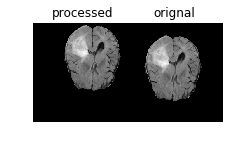

In [12]:
test = nib_load(path)
test1 = translateit(test,[25,25])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

# Scaling

In [13]:
import scipy
import scipy.ndimage

In [14]:
def scaleit(image, factor, isseg=False):
    order = 0 if isseg == True else 3

    height, width, depth= image.shape
    zheight             = int(np.round(factor * height))
    zwidth              = int(np.round(factor * width))
    zdepth              = depth

    if factor < 1.0:
        newimg  = np.zeros_like(image)
        row     = (height - zheight) // 2
        col     = (width - zwidth) // 2
        layer   = (depth - zdepth) // 2
        newimg[row:row+zheight, col:col+zwidth, layer:layer+zdepth] = scipy.ndimage.interpolation.zoom(image, (float(factor), float(factor), 1.0), order=order, mode='nearest')[0:zheight, 0:zwidth, 0:zdepth]

        return newimg

    elif factor > 1.0:
        row     = (zheight - height) // 2
        col     = (zwidth - width) // 2
        layer   = (zdepth - depth) // 2

        newimg = scipy.ndimage.interpolation.zoom(image[row:row+zheight, col:col+zwidth, layer:layer+zdepth], (float(factor), float(factor), 1.0), order=order, mode='nearest')  
        
        extrah = (newimg.shape[0] - height) // 2
        extraw = (newimg.shape[1] - width) // 2
        extrad = (newimg.shape[2] - depth) // 2
        newimg = newimg[extrah:extrah+height, extraw:extraw+width, extrad:extrad+depth]

        return newimg

    else:
        return image

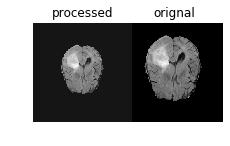

In [15]:
test = nib_load(path)
test1 = scaleit(test,0.75)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

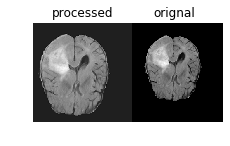

In [16]:
test = nib_load(path)
test1 = scaleit(test,1.25)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

# Rotation

In [17]:
import scipy
import scipy.ndimage

In [18]:
def rotateit(image, theta, isseg=False):
    order = 0 if isseg == True else 5
        
    return scipy.ndimage.rotate(image, float(theta), reshape=False, order=order, mode='nearest')

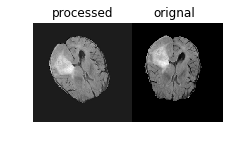

In [19]:
test = nib_load(path)
test1 = rotateit(test,30)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

# Flipping

In [20]:
def flipit(image, axes):
    
    if axes[0]:
        image = np.fliplr(image)
    if axes[1]:
        image = np.flipud(image)
    
    return image

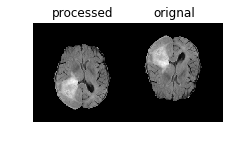

In [21]:
test = nib_load(path)
test1 = flipit(test, [1,0])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

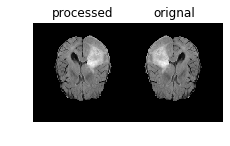

In [22]:
test = nib_load(path)
test1 = flipit(test, [0,1])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

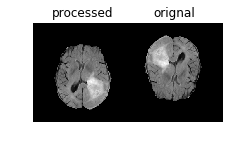

In [23]:
test = nib_load(path)
test1 = flipit(test, [1,1])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

# Cropping

In [24]:
def cropit(image, seg=None, margin=5):

    fixedaxes = np.argmin(image.shape[:2])
    trimaxes  = 0 if fixedaxes == 1 else 1
    trim    = image.shape[fixedaxes]
    center  = image.shape[trimaxes] // 2

    print(image.shape)
    print(fixedaxes)
    print(trimaxes)
    print(trim)
    print(center)

    if seg is not None:

        hits = np.where(seg!=0)
        mins = np.argmin(hits, axis=1)
        maxs = np.argmax(hits, axis=1)

        if center - (trim // 2) > mins[0]:
            while center - (trim // 2) > mins[0]:
                center = center - 1
            center = center + margin

        if center + (trim // 2) < maxs[0]:
            while center + (trim // 2) < maxs[0]:
                center = center + 1
            center = center + margin
    
    top    = max(0, center - (trim //2))
    bottom = trim if top == 0 else center + (trim//2)

    if bottom > image.shape[trimaxes]:
        bottom = image.shape[trimaxes]
        top = image.shape[trimaxes] - trim
  
    if trimaxes == 0:
        image   = image[top: bottom, :, :]
    else:
        image   = image[:, top: bottom, :]

    if seg is not None:
        if trimaxes == 0:
            seg   = seg[top: bottom, :, :]
        else:
            seg   = seg[:, top: bottom, :]

        return image, seg
    else:
        return image

(240, 240, 155)
0
1
240
120


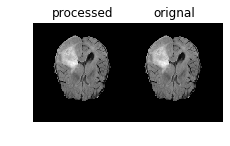

In [25]:
test = nib_load(path)
test1 = cropit(test, seg=None, margin=100)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

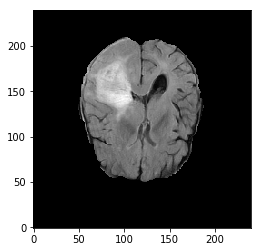

In [26]:
plt.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')

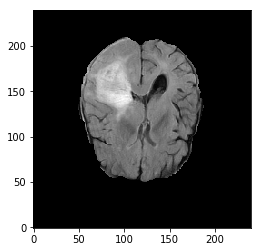

In [27]:
plt.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')